In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import nltk
import xgboost as xgb


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nomic import embed

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

import threading
import statistics
import scipy.stats as stats

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import xgboost as xgb
from joblib import dump
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import threading
import statistics
import re
from nltk.corpus import stopwords
import scipy.stats as stats




nltk.download('stopwords', quiet=True)
nltk.download('wordnet',quiet=True)
nltk.download('punkt', quiet=True)

True

## Constant

In [3]:
DATA_PATH = '../data/tweets.csv'

In [17]:
df = pd.read_csv(DATA_PATH)

## NLP function

In [18]:
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

In [19]:
def tokenization(input):
    assert(type(input) == list or type(input) == np.ndarray)

    processing_arm = [sub.split() for sub in input]
    extracted_tokens = []
    for elements in processing_arm:
        if type(elements) == list:
            for value in elements:
                extracted_tokens.append(value)

    release_stage = np.array(extracted_tokens)

    return release_stage


def stop_words_purge(stored_tokens):
    def remove_stopwords_from_text(tokens, stop_words_applied):
        assert (type(tokens) == list or type(tokens) == np.ndarray)
        if type(tokens) != np.ndarray:
            tokens = np.array(tokens)

        filtered_tokens = []
        for token in tokens:
            if token.lower() not in stop_words_applied:
                filtered_tokens.append(token)
        return filtered_tokens

    assert(type(stored_tokens) == list or type(stored_tokens) == np.ndarray)
    dev_mode = 0

    english_stop_words = set(stopwords.words("English"))
    spanish_stop_words = set(stopwords.words("Spanish"))
    if dev_mode == 1:
        print("<------------->")
        print("Purging of spanish and english stop words in progress...")
        print(f"English stop words(length: {len(english_stop_words)}): {english_stop_words}")
        print(f"Spanish stop words(length: {len(spanish_stop_words)}): {spanish_stop_words}")

    post_purge = []
    # streamlined version
    for tokens in stored_tokens:
        tokens_lower = [token.lower() for token in tokens]
        english_clearance = remove_stopwords_from_text(tokens_lower, english_stop_words)
        spanish_clearance = remove_stopwords_from_text(english_clearance, spanish_stop_words)
        post_purge.append(spanish_clearance)
    if dev_mode == 1:
        print("Purge of Spanish and english stop words completed...")
        print("<------------->")

    return post_purge


def replace_additional_dollar_signs(text):
    assert(type(text) == str)
    parts = text.split('$', 1)

    if len(parts) > 1:
        # If there was at least one '$', replace the rest and reconstruct the string
        parts[1] = re.sub(r"\$", "", parts[1])
        return '$'.join(parts)
    else:
        return text


def dataframe_generator(description_column, results_column, c1, c2, column_name, developer_mode):
    def data_cataloging(mutation_col_1, mutation_col_2, data_logging_01, data_logging_02):
        assert(type(mutation_col_1) == str and type(mutation_col_2) == str)
        assert(type(data_logging_01) == list or type(data_logging_01) == np.ndarray)
        assert(type(data_logging_01) == list or type(data_logging_02) == np.ndarray)

        dataframe = pd.DataFrame({
            mutation_col_1: data_logging_01,
            mutation_col_2: data_logging_02
        })
        return dataframe

    assert(type(description_column) == list or type(description_column) == np.ndarray)
    assert(type(results_column) == list or type(results_column) == np.ndarray)
    assert(type(c1) == str)
    assert(type(c2) == str)
    assert(type(column_name) == str)
    assert(type(developer_mode) == int)
    assert(len(description_column) == len(results_column))

    dataframe_desription = description_column
    dataframe_specifics = results_column

    dataframe = data_cataloging(c1, c2, dataframe_desription, dataframe_specifics)
    file_name = f"{column_name.capitalize()} data analysis results.csv"

    #saving it as a csv.
    #-------------------
    dataframe.to_csv(file_name, index=True)
    # -------------------
    if developer_mode == 1:
        print(f"File name: {file_name}")


def enhanced_diagnostics(column_name, input_data, developer_mode):
    assert (type(column_name) == str)
    assert (type(input_data) == list or type(input_data) == np.ndarray)
    assert (type(developer_mode) == int)
    if type(input_data) != np.ndarray:
        input_data = np.array(input_data)

    zeros = 0
    positives = 0
    negatives = 0
    for values in input_data:
        if values == 0:
            zeros += 1
        elif values > 0:
            positives += 1
        elif values < 0:
            negatives += 1
    percentage_of_unique = (len(set(input_data)) / len(input_data))*100

    updated_name = column_name + " enhanced diagnostics"
    description = ["Number of unique values", "Percentage of unique values", "Zeros", "Negatives", "Positives", "Total number of raw input values"]
    outputs = [len(set(input_data)), f"{percentage_of_unique}%", zeros, negatives, positives, len(input_data)]
    dataframe_generator(description,outputs, "Analysis metric", "Result",updated_name.upper(),developer_mode)

    if developer_mode == 1:
        if len(description) == len(outputs):
            for element_A175 in range(len(description)):
                print(f"{description[element_A175]}: {outputs[element_A175]}")


def numeric_analysis_arm(column_name, input_data, developer_mode):
    assert(type(column_name) == str)
    assert(type(input_data) == list or type(input_data) == np.ndarray)
    assert(type(developer_mode) == int)
    if type(input_data) != np.ndarray:
        input_data = np.array(input_data)

    analysis_description = ["Maximum", "Minimum", "Mean", "Median", "Mode", "Standard deviation", "Range", "Skew", "Kurtosis", "Variance"]
    analysis_results = [round(np.max(input_data), 4), round(np.min(input_data), 4), round(np.mean(input_data), 4), round(np.median(input_data), 4),
                        round(statistics.mode(input_data), 4), round(np.std(input_data), 4), round(np.max(input_data) - np.min(input_data), 4),
                        stats.skew(input_data),round(stats.kurtosis(input_data),4), round(statistics.variance(input_data),4)]
    if developer_mode == 1:
        for analysis_outputs in range(len(analysis_results)):
            print(f"{analysis_description[analysis_outputs]}: {analysis_results[analysis_outputs]}")

    dataframe_generator(analysis_description,analysis_results,"Analysis metric", "Result",column_name.upper(), developer_mode)


def remove_emojis(text):
    assert(type(text))
    # Regex pattern to match all emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def link_mention_purge(text):
    assert(type(text) == str)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove Mentions
    text = re.sub(r'@\w+', '', text)
    # Remove everything except letters and necessary whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()

    return text


def inpurity_purging_protocol(input_storage):
    assert(type(input_storage) == list or type(input_storage) == np.ndarray)
    if type(input_storage) != np.ndarray:
        input_storage = np.array(input_storage)
    cleared = []
    for element in input_storage:
        text_no_urls = link_mention_purge(element)
        baseline = remove_emojis(text_no_urls).replace("(","").replace(")","").strip('"')
        updated_baseline = re.sub(r"(\w)([,.!?;:()-])", r"\1 \2", baseline)
        purged_S01 = updated_baseline.replace("..", "")
        purged_S02 = purged_S01.replace('"',"")
        purged_S03 = purged_S02.replace(";)","")
        purged_S04 = purged_S03.replace("*", "")
        purged_S05 = re.sub(r"@\w+", " ", purged_S04)
        purged_S06 = purged_S05.replace("  "," ")
        purged_S07 = purged_S06.replace("!!", "!")
        purged_S08 = purged_S07.replace("!!!", "!")
        purged_S09 = replace_additional_dollar_signs(purged_S08)
        purged_S10 = purged_S09.replace(",,","")
        purged_S11 = purged_S10.replace("=(","")
        purged_S12 = purged_S11.replace("=>","")
        purged_S13 = purged_S12.replace(" .", "")
        purged_S14 = purged_S13.replace("!","")
        cleared.append(purged_S14)

    cleared_numpy_conversion = np.array(cleared)

    return cleared_numpy_conversion


def remove_stopwords_from_text(tokens, stop_words_applied):
    assert(type(tokens) == list or type(tokens) == np.ndarray)
    if type(tokens) != np.ndarray:
        tokens = np.array(tokens)

    filtered_tokens = []
    for token in tokens:
        if token.lower() not in stop_words_applied:
            filtered_tokens.append(token)
    return filtered_tokens

## feature engineering

In [20]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

tfidf_matrix = vectorizer.fit_transform(df['text'])
feature_names = vectorizer.get_feature_names_out()

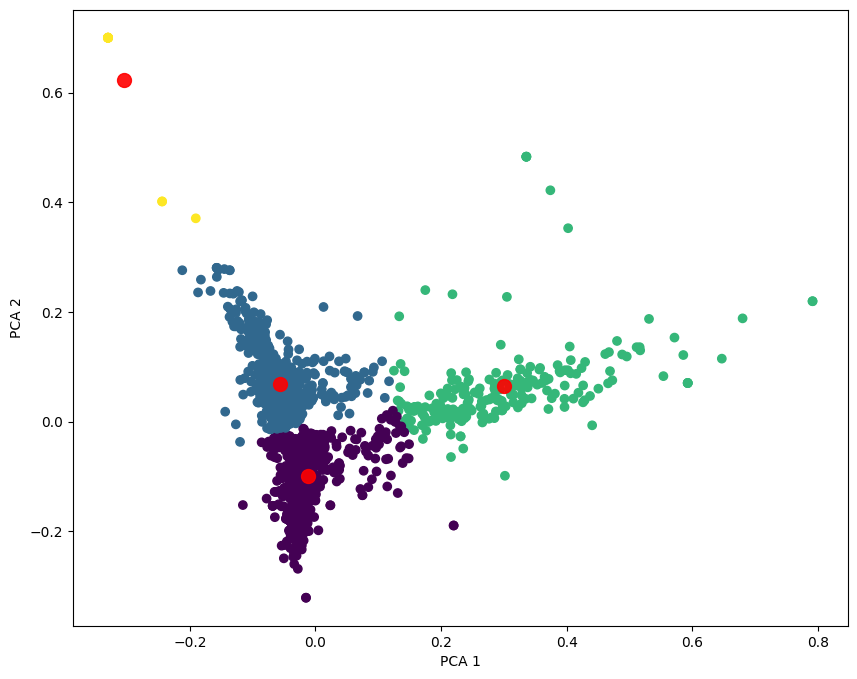

In [21]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(reduced_features)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [22]:
def tfidf_cluster_terms(tfidf_matrix, clusters, feature_names, n_terms=10):
    df = pd.DataFrame(tfidf_matrix.todense()).groupby(clusters).mean()
    
    for i, row in df.iterrows():
        print(f"Cluster {i}:")
        top_indices = row.argsort()[-n_terms:][::-1]
        top_terms = ", ".join([feature_names[index] for index in top_indices])
        print(top_terms)

tfidf_cluster_terms(tfidf_matrix, clusters, feature_names)

Cluster 0:
boat, menas, immigrants, sudaca, panchito, don, people, come, spain, government
Cluster 1:
immigrant, illegal, country, don, like, years, going, spanish, work, people
Cluster 2:
black, fucking, shitty, shit, man, guy, moor, nigga, don, bitch
Cluster 3:
immigrant, illegal, country, zero, freely, forget, founded, france, free, freedom


In [23]:
X_train, X_test, y_train, y_test = train_test_split( tfidf_matrix,  df['label'], test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Accuracy:", lr_model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.7775
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       207
           1       0.77      0.77      0.77       193

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



In [24]:
output = embed.text(
    texts=df['text'].tolist(),
    model='nomic-embed-text-v1',
)

embeddings = np.array(output['embeddings'])

print(embeddings.shape)

(2000, 768)


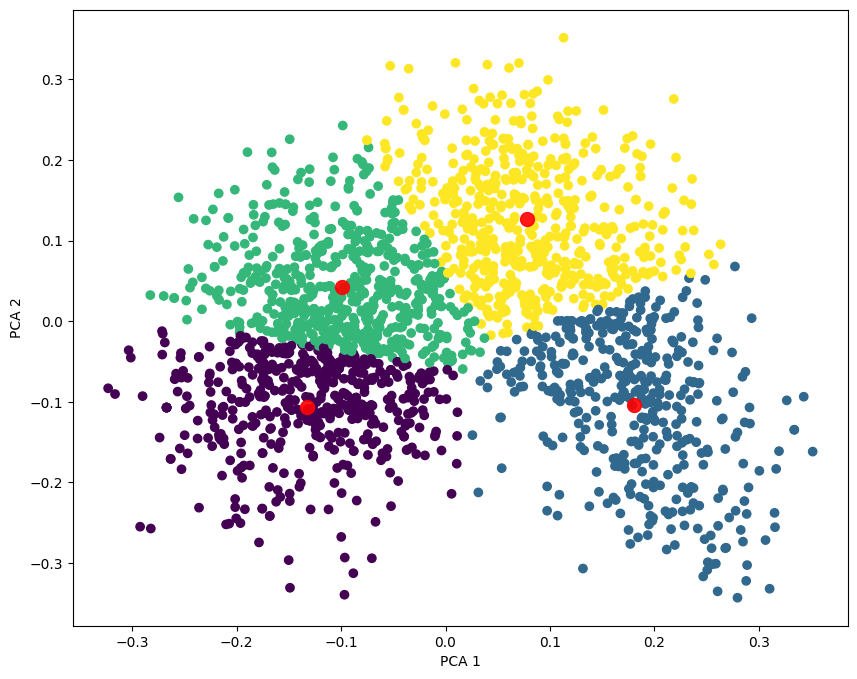

In [25]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(embeddings)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(reduced_features)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [26]:
df['cluster'] = clusters

def nomic_cluster_terms(n_terms=10):
    dfc = df.groupby('cluster')['text'].apply(list).reset_index()
    top_terms = {}

    for cluster in dfc['cluster']:
        texts = dfc[dfc['cluster'] == cluster]['text'].iloc[0]
        vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = vectorizer.fit_transform(texts)
        feature_array = np.array(vectorizer.get_feature_names_out())
        tfidf_sorting = np.argsort(tfidf_matrix.toarray()).flatten()[::-1]
        
        top_n = feature_array[tfidf_sorting][:n_terms]
        top_terms[cluster] = top_n
        
    return top_terms

top_words = nomic_cluster_terms(n_terms=10)
for cluster, words in top_words.items():
    print(f"Cluster {cluster}:\n{', '.join(words)}")

Cluster 0:
scheduling, appointments, hello, nonimmigrant, visa, information, like, famous, family, families
Cluster 1:
gold, skinning, guide, added, methods, routes, update, plants, taste, complete
Cluster 2:
morning, bravo, aviary, award, admission, cavalli, winner, procedure, kind, fare
Cluster 3:
people, care, option, come, culture, far, families, love, better, life


In [28]:
X_train, X_test, y_train, y_test = train_test_split(embeddings,  df['label'], test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Accuracy:", lr_model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.8075
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       207
           1       0.82      0.78      0.80       193

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



embedding seems better, so it will be used further

## Model

In [29]:
output = embed.text(
    texts=df['text'].tolist(),
    model='nomic-embed-text-v1',
)

print(output['usage'])

embeddings = np.array(output['embeddings'])

print(embeddings.shape)

{'prompt_tokens': 76230, 'total_tokens': 76230}
(2000, 768)


### Tree

In [33]:
X, y = embeddings, df['label']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Accuracy:", lr_model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.8075
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       207
           1       0.82      0.78      0.80       193

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [31]:
param_grid = {
    'n_estimators': [200, 400, 600], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10, 15],  
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Params: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}
Best Score: 0.7987500000000001


In [34]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8075
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       207
           1       0.82      0.77      0.79       193

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



### XGBoost

In [35]:
X, y = embeddings, df['label']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Accuracy:", lr_model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.8075
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       207
           1       0.82      0.77      0.79       193

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [37]:
def ml_diagnostics(y_test, predictions):
    assert(type(y_test) == list or type(y_test) == np.ndarray)
    assert(type(predictions) == list or type(predictions) == np.ndarray)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    details = ["Accuracy", "Precision", "Recall", "F1"]
    results = [round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4)]
    if len(details) == len(results):
        print("Diagnostic metrics")
        for elements in range(len(results)):
            print(f"{details[elements]}: {results[elements]}")

    if (accuracy > 0.9) and (precision > 0.9):
        print()
        print(f"Go touch come grass. You got accuracy to reach {round(accuracy, 4)} and precision to reach {round(precision, 4)}")
        if (recall > 0.8) and (f1 > 0.8):
            print("Bruv. Go live life outside. This is already accurate like you had OCD writing this.")
            print(f"Recall is {round(recall, 4)} and F1 score is {round(f1, 4)}. Go touch some grass. Seriously.")

In [50]:
cleaned_tweet = df["text"].to_numpy()
tags = df["label"].to_numpy()

# Tokenization
token_conversion = []
for tweets in cleaned_tweet:
    post_conversion = word_tokenize(tweets)
    token_conversion.append(post_conversion)

print("Tokenization complete")
for i in range(3):
    print(token_conversion[i])

# Stopwords purge
english_stop_words = set(stopwords.words("English"))
spanish_stop_words = set(stopwords.words("Spanish"))
print("<------------->")
print("Purging of spanish and english stop words in progress...")
print(f"English stop words(length: {len(english_stop_words)}): {english_stop_words}")
print(f"Spanish stop words(length: {len(spanish_stop_words)}): {spanish_stop_words}")

stage_0 = []
# English stopwords removal
for stage_0_element in token_conversion:
    english_cleaned_text = remove_stopwords_from_text(stage_0_element, english_stop_words)
    stage_0.append(english_cleaned_text)

stop_words_stage_1 = []
# Spanish stop words removal
stage_1 = []
for stage_1_elements in stage_0:
    spanish_cleaned_text = remove_stopwords_from_text(stage_1_elements, spanish_stop_words)
    stage_1.append(spanish_cleaned_text)
print("Purge of Spanish and english stop words completed...")
print("<------------->")

# lammination
lemmatizer = WordNetLemmatizer()
lamminized_tokens = []
for post_processed_tokens in stage_1:
    processed_tokens = []
    for token in post_processed_tokens:
        if token not in english_stop_words and token not in spanish_stop_words and token.isalpha():
            # Lemmatize the token and append to the result list
            lemmatized_token = lemmatizer.lemmatize(token)
            processed_tokens.append(lemmatized_token)
    lamminized_tokens.append(processed_tokens)


preprocessed_texts = [" ".join(tokens) for tokens in lamminized_tokens]

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(preprocessed_texts)
y = tags
print("...")
print(f"X type: {type(X)}")
print(f"y type: {type(y)}")
print("...")


print("Baseline deployed")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
ml_diagnostics(y_test, predictions)
# dump(clf, "Standard_baseline_boosted_model.joblib")


"""
Benchmark(label encoder = True)
--------------
Diagnostic metrics
Accuracy: 0.74
Precision: 0.7405405405405405
Recall: 0.7098445595854922
F1: 0.7248677248677249

Alternative alteration
n_estimators=100, learning_rate=0.1, max_depth=5
------------------
Diagnostic metrics
Accuracy: 0.76
Precision: 0.7975460122699386
Recall: 0.6735751295336787
F1: 0.7303370786516852

Benchmark to beat
----------
Upgraded baseline deployed
Diagnostic metrics
Accuracy: 0.9133333333333333
Precision: 0.9466666666666667
Recall: 0.8875
F1: 0.9161290322580645
"""

Tokenization complete
['They', 'caught', 'the', 'suspect', ',', 'he', 'is', 'a', 'Colombian', 'national', '.', 'It', 'is', 'no', 'surprise', ',', 'violence', 'is', 'part', 'of', 'the', 'immigrant', 'of', 'Colombian', 'origin', ',', 'it', 'is', 'his', 'culture', '.']
['When', 'they', 'realize', 'that', 'they', 'were', 'murderers', 'or', 'drug', 'traffickers', 'and', 'they', 'are', 'caught', ',', 'they', 'will', 'say', 'we', 'have', 'found', 'this', 'illegal', 'immigrant', 'who', 'was', 'a', 'criminal', '.']
['Hahaha', ',', 'you', 'were', 'good', 'there', ',', 'you', 'can', 'see', 'YOUR', 'SUDACA', 'HEAD', 'AND', 'A', 'BAD', 'PAYER', ',', 'they', 'have', 'it', 'in', 'their', 'DNA', '!', '!', '!', 'those', 'pieces', 'of', 'paper', 'for', 'serious', 'countries', 'is', 'a', 'commitment', 'for', 'you', 'and', 'for', 'the', 'Sudacas', 'not']
<------------->
Purging of spanish and english stop words in progress...
English stop words(length: 179): {'to', "hasn't", 'needn', 'over', 'now', 'them'

'\nBenchmark(label encoder = True)\n--------------\nDiagnostic metrics\nAccuracy: 0.74\nPrecision: 0.7405405405405405\nRecall: 0.7098445595854922\nF1: 0.7248677248677249\n\nAlternative alteration\nn_estimators=100, learning_rate=0.1, max_depth=5\n------------------\nDiagnostic metrics\nAccuracy: 0.76\nPrecision: 0.7975460122699386\nRecall: 0.6735751295336787\nF1: 0.7303370786516852\n\nBenchmark to beat\n----------\nUpgraded baseline deployed\nDiagnostic metrics\nAccuracy: 0.9133333333333333\nPrecision: 0.9466666666666667\nRecall: 0.8875\nF1: 0.9161290322580645\n'

## Model but deep learning (not recommend running)

### LSTM

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from collections import defaultdict

In [ ]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
BATCH_SIZE = 64
VOCAB_SIZE = 6000
LSTM_LAYER = 1
HIDDEN_DIM = 100
OUTPUT_DIM = 257

In [ ]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(X)

def text_to_seq(text):
    sequences = tokenizer.texts_to_sequences(text)
    return sequence.pad_sequences(sequences, maxlen=40)

In [ ]:
class TweetClassifier(nn.ModuleList):

	def __init__(self):
		super(TweetClassifier, self).__init__()

		self.batch_size = 64
		self.hidden_dim = 100
		self.LSTM_layers = 20
		self.input_size = 6000

		self.dropout = nn.Dropout(0.5)
		self.embedding = nn.Embedding(self.input_size, self.hidden_dim, padding_idx=0)
		self.lstm = nn.LSTM(input_size=self.hidden_dim, hidden_size=self.hidden_dim, num_layers=self.LSTM_layers, batch_first=True)
		self.fc1 = nn.Linear(in_features=self.hidden_dim, out_features=257)
		self.fc2 = nn.Linear(257, 1)

	def forward(self, x):

		h = torch.zeros((self.LSTM_layers, x.size(0), self.hidden_dim))
		c = torch.zeros((self.LSTM_layers, x.size(0), self.hidden_dim))

		torch.nn.init.xavier_normal_(h)
		torch.nn.init.xavier_normal_(c)

		out = self.embedding(x)
		out, (hidden, cell) = self.lstm(out, (h,c))
		out = self.dropout(out)
		out = torch.relu_(self.fc1(out[:,-1,:]))
		out = self.dropout(out)
		out = torch.sigmoid(self.fc2(out))

		return out

In [ ]:
class MetricMonitor:
    def __init__(self, float_precision=3):
        self.float_precision = float_precision
        self.reset()

    def reset(self):
        self.metrics = defaultdict(lambda: {"val": 0, "count": 0, "avg": 0})

    def update(self, metric_name, val):
        metric = self.metrics[metric_name]

        metric["val"] += val
        metric["count"] += 1
        metric["avg"] = metric["val"] / metric["count"]

    def __str__(self):
        return " | ".join(
            [
                "{metric_name}: {avg:.{float_precision}f}".format(
                    metric_name=metric_name, avg=metric["avg"], float_precision=self.float_precision
                )
                for (metric_name, metric) in self.metrics.items()
            ]
        )

In [ ]:
class RacismDataset(Dataset):
    def __init__(self, x, y):
        self.seq_tweets = text_to_seq(x)
        self.labels = y

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        tweet = self.seq_tweets[idx] #numpy
        label = self.labels.iloc[idx] #pandas df

        return tweet, label

In [ ]:
train_dataloader = DataLoader(RacismDataset(X_train, y_train), batch_size=64, shuffle=True)
test_dataloader = DataLoader(RacismDataset(X_test, y_test))

model = TweetClassifier()
optimizer = optim.RMSprop(model.parameters(), lr=1e-4)

In [ ]:
def train(model, train_loader, optimizer, epoch, device):
    model = model.to(device)
    model.train()
    train_loss = 0

    monitor = MetricMonitor()
    # loss_function = CrossEntropyLoss()

    stream = tqdm(train_loader)
    for data, target in stream:
        data = data.to(device)
        target = target.to(device)

        data = data.type(torch.LongTensor)
        target = target.type(torch.FloatTensor)

        optimizer.zero_grad()
        output = model(data).squeeze(1)
        loss = F.binary_cross_entropy(output, target)
        train_loss += loss.sum().item()
        loss.backward()
        optimizer.step()

        # logs
        monitor.update("loss", loss.item())
        stream.set_description(
            "Epoch: {epoch}. {monitor}".format(epoch=epoch, monitor=monitor)
        )

    return monitor


def test(model, test_loader, epoch, device):
    model = model.to(device)
    model.eval()

    monitor = MetricMonitor()
    # loss_function = CrossEntropyLoss()

    stream = tqdm(test_loader)
    with torch.no_grad():
        for data, target in stream:
            data = data.to(device)
            target = target.to(device)

            data = data.type(torch.LongTensor)
            target = target.type(torch.FloatTensor)

            output = model(data).squeeze(1)

            test_loss = F.binary_cross_entropy(output, target).sum().item()
            pred = (output >= 0.5).long()
            correct = pred.eq(target.view_as(pred)).sum().item()

            # logs
            monitor.update("test loss", test_loss)
            monitor.update("accuracy", correct / data.shape[0])
            stream.set_description(
                "Epoch: {epoch}. {monitor}".format(epoch=epoch, monitor=monitor)
            )
    return monitor

def train_test(model, optimizer, train_loader, test_loader, device, n_epochs=1):
    for epoch in range(0, n_epochs):
        train(model, train_loader, optimizer, epoch, device)
        test(model, test_loader, epoch, device)

In [ ]:
# train_test(model=model,
#            optimizer=optimizer,
#            train_loader=train_dataloader,
#            test_loader=test_dataloader,
#            device="cpu",
#            n_epochs=70
#            )

### Transformers

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, AutoTokenizer
from datasets import Dataset
import evaluate

In [ ]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
accuracy = evaluate.load("accuracy")

id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

for param in model.distilbert.parameters():
    param.requires_grad = False

for param in model.classifier.parameters():
    param.requires_grad = True

In [ ]:
class RacismDatasetHF(Dataset):
    def __init__(self, x, y):
        self.seq_tweets = x
        self.labels = y

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        tweet = self.seq_tweets.iloc[idx]
        label = self.labels.iloc[idx]

        return {'label': label, 'text': tweet}

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
# weird way to convert pytorch dataset into huggingface dataset

torch_dataset_train = RacismDatasetHF(X_train, y_train)
torch_dataset_test = RacismDatasetHF(X_test, y_test)


def gen():
    for idx in range(len(torch_dataset_train)):
        yield torch_dataset_train[idx]

def gen2():
    for idx in range(len(torch_dataset_test)):
        yield torch_dataset_test[idx]


train_dset = Dataset.from_generator(gen)
test_dset = Dataset.from_generator(gen2)

hf_train = train_dset.map(preprocess_function, batched=True)
hf_test = test_dset.map(preprocess_function)

In [ ]:
training_args = TrainingArguments(
    output_dir="distil_vanilla",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=16,
    num_train_epochs=20,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=hf_train,
    eval_dataset=hf_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
# trainer.train()

repo: https://huggingface.co/philip1231/distil_low_lr